# Visualization: Top N words in positive and negative classes for each language


In [ ]:
# Steps:
# Read all language files into dfs
# Add language name column to df
# Concat / Merge all the dfs vertically

In [ ]:
!pip install transformers

In [110]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from itertools import islice
#from transformers import AutoTokenizer

## Read Files

In [111]:
file_names = ['am_train', 'dz_train', 'ha_train', 'ig_train', 'ma_train', 'pcm_train', 'pt_train', 'sw_train', 'yo_train']
def read_file(file_name, language):
    lang_initial = file_name.split("_")
    
    # raw file
    if language == 'African':
        file_path = r'semeval2023-afrisenti-main/data/raw/train/' + file_name + '.tsv'
        df = pd.read_csv(file_path, sep='\t', header=0)
        df.columns = df.columns.str.replace(' ', '')
        df['label'] = df['label'].str.replace(" ", "")
        df_name = 'df_' +  lang_initial[0] 
        
    # english translated file
    else:
        file_path = r'train_afri_to_eng_tsv/' + file_name + '.csv'
        df = pd.read_csv(file_path, sep='\t', header=0)
        df.columns = df.columns.str.replace(' ', '')
        df['label'] = df['label'].str.replace(" ", "")
        df_name = 'df_' + lang_initial[0] + '_eng' 
        
    return df, df_name


### Save individual dataframes and store dfs in a dictionary

In [112]:
raw_dfs_dict ={}
for file_name in file_names:
    df, df_name = read_file(file_name, 'African')
    # Save individual dataframe
    exec(df_name + " = df")
    # Add to dictionary
    raw_dfs_dict[df_name] = df
#print(raw_dfs_dict)

translated_dfs_dict ={}
for file_name in file_names:
    df, df_name = read_file(file_name, 'English')
    # Save individual dataframe
    exec(df_name + " = df")
    # Add to dictionary
    translated_dfs_dict[df_name] = df
#print(translated_dfs_dict)

### Testing individual dataframes

In [113]:
for i in raw_dfs_dict.values():
    print(i.head())
    
for i in translated_dfs_dict.values():
    print(i.head())

               ID                                              tweet     label
0  am_train_00001  Tesfaye ለካስ ጭብል ለብሰሽ የፕሮፌሰርን ፎቶ ለጥፈክ እልም ያልክ ባ...  negative
1  am_train_00002  ይሄው ነው አይደል የእውቀትሽ ጥግ....በሰሚ ሰሚ ከምትናገሪ ለምን ታሪክ...  negative
2  am_train_00003                ዘገበ ይባላል? ሌላ የሚባል ነገር ካለ አንተዉ ንገረን!  negative
3  am_train_00004  ?? ድሮ በዘመነ ኮዳክ ፎቶ ቤት ፍላሹ ፏ ሲል አይናችን ተጨፍኖ እንዳይወ...  negative
4  am_train_00005                                     ዠልጥ?? ???? ገገማ  negative
               ID                                              tweet     label
0  dz_train_00001  @user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة ....  negative
1  dz_train_00002                                  @user تبهليل هاذا  negative
2  dz_train_00003                       @user هاذي تبهليل ماشي فهامة  negative
3  dz_train_00004  @user @user تخاف نجاوب يا ناصر ببلوك لانو طريق...  negative
4  dz_train_00005  @user مرنكة أقسم بالله 😂😂😂تبهليل ما بعد منتصف ...  negative
               ID                                   

### Combine Dataframes

In [115]:
# Combine Data Files

def merge_data_files(path, suffix):
    all_files = glob.glob(os.path.join(path , '*' + suffix))
    df_list = []
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, sep='\t', header=0)
        newfilename = filename.split("\\")
        language = newfilename[1].replace(suffix, "")
        df['language'] = language
        df.columns = df.columns.str.replace(' ', '')
        df['label'] = df['label'].str.replace(" ", "")
        df_list.append(df)
    
    df_combined = pd.concat(df_list, axis=0, ignore_index=True) 
    return df_combined

In [116]:
df_raw_combined = merge_data_files(r'semeval2023-afrisenti-main/data/raw/train/', '_train.tsv')
df_raw_combined

,ID,tweet,label,language
0,am_train_00001,Tesfaye ለካስ ጭብል ለብሰሽ የፕሮፌሰርን ፎቶ ለጥፈክ እልም ያልክ ባ...,negative,am
1,am_train_00002,ይሄው ነው አይደል የእውቀትሽ ጥግ....በሰሚ ሰሚ ከምትናገሪ ለምን ታሪክ...,negative,am
2,am_train_00003,ዘገበ ይባላል? ሌላ የሚባል ነገር ካለ አንተዉ ንገረን!,negative,am
3,am_train_00004,?? ድሮ በዘመነ ኮዳክ ፎቶ ቤት ፍላሹ ፏ ሲል አይናችን ተጨፍኖ እንዳይወ...,negative,am
4,am_train_00005,ዠልጥ?? ???? ገገማ,negative,am
...,...,...,...,...
56093,yo_train_08518,"RT @user: Oju adan o'nribi, oju awodi o'nri or...",positive,yo
56094,yo_train_08519,"a tú dúpẹ́ lọ́wọ́ àwọn alátakò wá náà, a ó gbọ...",positive,yo
56095,yo_train_08520,"Ẹní tó làná, tó lòní, kò leè lọ̀la; Ọlọ́run nì...",positive,yo
56096,yo_train_08521,"My God is """"""""""""""""onise iyanu"""""""""""""""" ( A Mira...",positive,yo


In [117]:
df_raw_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56098 entries, 0 to 56097
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        56098 non-null  object
 1   tweet     56098 non-null  object
 2   label     56098 non-null  object
 3   language  56098 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [118]:
df_raw_combined.shape

(56098, 4)

In [119]:
df_translated_combined = merge_data_files(r'train_afri_to_eng_tsv/', '_train.csv')
df_translated_combined

,ID,tweet,label,language
0,am_train_00001,"Tesfaye, you posted a picture of a professor ...",negative,am
1,am_train_00002,"This is the corner of your knowledge, isn't it?",negative,am
2,am_train_00003,Is it called a report? If there is anything e...,negative,am
3,am_train_00004,?? It reminded me of what we used to do in th...,negative,am
4,am_train_00005,Is it clear?? ???? He recovered,negative,am
...,...,...,...,...
56093,yo_train_08518,"RT @user: The eyes of a bat are here, the eye...",positive,yo
56094,yo_train_08519,"We are grateful to our opponents, we will be ...",positive,yo
56095,yo_train_08520,"The person who was yesterday, who is today, ca...",positive,yo
56096,yo_train_08521,My God is a miracle worker #yoruba,positive,yo


In [120]:
df_translated_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56098 entries, 0 to 56097
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        56098 non-null  object
 1   tweet     56098 non-null  object
 2   label     56098 non-null  object
 3   language  56098 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [121]:
df_translated_combined.shape

(56098, 4)

## Data Exploration:

In [2]:
df_am.head()

,ID,tweet,label
0,am_train_00001,Tesfaye ለካስ ጭብል ለብሰሽ የፕሮፌሰርን ፎቶ ለጥፈክ እልም ያልክ ባ...,negative
1,am_train_00002,ይሄው ነው አይደል የእውቀትሽ ጥግ....በሰሚ ሰሚ ከምትናገሪ ለምን ታሪክ...,negative
2,am_train_00003,ዘገበ ይባላል? ሌላ የሚባል ነገር ካለ አንተዉ ንገረን!,negative
3,am_train_00004,?? ድሮ በዘመነ ኮዳክ ፎቶ ቤት ፍላሹ ፏ ሲል አይናችን ተጨፍኖ እንዳይወ...,negative
4,am_train_00005,ዠልጥ?? ???? ገገማ,negative


In [3]:
df_am.shape

(5984, 3)

In [4]:
df_dz.head()

,ID,tweet,label
0,dz_train_00001,@user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة ....,negative
1,dz_train_00002,@user تبهليل هاذا,negative
2,dz_train_00003,@user هاذي تبهليل ماشي فهامة,negative
3,dz_train_00004,@user @user تخاف نجاوب يا ناصر ببلوك لانو طريق...,negative
4,dz_train_00005,@user مرنكة أقسم بالله 😂😂😂تبهليل ما بعد منتصف ...,negative


In [5]:
df_dz.shape

(1651, 3)

In [6]:
df_ha.head()

,ID,tweet,label
0,ha_train_00001,@user Da kudin da Arewa babu wani abin azo aga...,negative
1,ha_train_00002,@user Kaga wani Adu ar Banda💔😭 wai a haka Shi ...,negative
2,ha_train_00003,@user Sai haquri fa yan madrid daman kunce cha...,negative
3,ha_train_00004,@user Hmmm yanzu kai kasan girman allah daxaka...,negative
4,ha_train_00005,@user @user Wai gwamno nin Nigeria suna afa kw...,negative


In [7]:
df_ha.shape

(14172, 3)

In [8]:
df_ig.head()

,ID,tweet,label
0,ig_train_00001,Nna Ike Gwuru ooo. 😂 https://t.co/NDS7juFBGd,negative
1,ig_train_00002,@user Chineke nna kezi mgbe ole???,negative
2,ig_train_00003,Lol. Isi adirokwanu gi nma.. 😐😒😒😒 https://t.co...,negative
3,ig_train_00004,@user haha. Fulani herdsmen. akpa amu gi retwe...,negative
4,ig_train_00005,Nna ghetto di gi na aru biko!!! https://t.co/4...,negative


In [9]:
df_ig.shape

(10192, 3)

In [10]:
df_ma.head()

,ID,tweet,label
0,ma_train_00001,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,neutral
1,ma_train_00002,hhhh hardart jomhorha la fi3lan kadahko lach m...,neutral
2,ma_train_00003,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,neutral
3,ma_train_00004,كان افظل حاكم عربي',positive
4,ma_train_00005,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,neutral


In [11]:
df_ma.shape

(5583, 3)

In [12]:
df_pcm.head()

,ID,tweet,label
0,pcm_train_00001,yeah ‍️the guy wants to trend dat was why e jo...,negative
1,pcm_train_00002,this life is so funny sef you will work hard a...,negative
2,pcm_train_00003,dis is unfair of urcompany goingtowks nw ive b...,negative
3,pcm_train_00004,lil wayne don vex me im actually not excited a...,negative
4,pcm_train_00005,dis is unfair of ur company going to wks nw iv...,negative


In [13]:
df_pcm.shape

(5121, 3)

In [14]:
df_pt.head()

,ID,tweet,label
0,pt_train_00001,"Pedi uma resposta a Deus, ele deu me. Estou mu...",negative
1,pt_train_00002,Só queria poder voltar no tempo e fazer difere...,negative
2,pt_train_00003,@user Este tipo é execrável! Muito pior que pa...,negative
3,pt_train_00004,"Tem gajos que só de você atravessar estrada 🛣,...",negative
4,pt_train_00005,Esses gajos de Yababuluko têm mng barulho nos ...,negative


In [15]:
df_pt.shape

(3063, 3)

In [16]:
df_sw.head()

,ID,tweet,label
0,sw_train_00001,Kwani tanesco wanakataga umeme makusudinadhani...,negative
1,sw_train_00002,cjawahi kuona content yoyote zaidi ya kuwa ana...,negative
2,sw_train_00003,Bomu lililokuwa limetegwa ndani ya gari likiwa...,negative
3,sw_train_00004,Kuna video inasambaa mitandaoni jamaa amemfuma...,negative
4,sw_train_00005,Viwavijeshi wanapita katika hatua kuu 6 za uku...,negative


In [17]:
df_sw.shape

(1810, 3)

In [18]:
df_yo.head()

,ID,tweet,label
0,yo_train_00001,"Ìwọ ikú òpònú abaradúdú wọ, o ò ṣe é 're o. O ...",negative
1,yo_train_00002,"Yorùbá nbú'yàn ṣá """"""""""""""""..àyà wanle bí òkú ì...",negative
2,yo_train_00003,"Òwe àgbà ní """"""""""""""""ọmọlọ́mọ là á rán níṣẹ́ à ...",negative
3,yo_train_00004,RT @user: @user asa kasa ti awon eyan ko ni od...,negative
4,yo_train_00005,RT @user: Mo ń rí àwọn èébú kọ̀ọ̀kan. Àti àwọn...,negative


In [19]:
df_yo.shape

(8522, 3)

### Plotting

In [43]:
df2 = df_raw_combined.groupby(['language'])['language'].count()

In [44]:
df2

Language
am      5984
dz      1651
ha     14172
ig     10192
ma      5583
pcm     5121
pt      3063
sw      1810
yo      8522
Name: Language, dtype: int64

Text(0,0.5,'count')

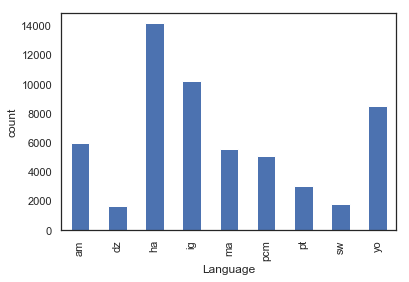

In [99]:
df3 = df_raw_combined.groupby('language').size().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')

In [47]:
df4 = df_raw_combined.groupby(['language','label'])['language'].count()

In [48]:
df4

Language  label   
am        negative    1548
          neutral     3104
          positive    1332
dz        negative     892
          neutral      342
          positive     417
ha        negative    4573
          neutral     4912
          positive    4687
ig        negative    2600
          neutral     4508
          positive    3084
ma        negative    1664
          neutral     2161
          positive    1758
pcm       negative    3241
          neutral       72
          positive    1808
pt        negative     782
          neutral     1600
          positive     681
sw        negative     191
          neutral     1072
          positive     547
yo        negative    1872
          neutral     3108
          positive    3542
Name: Language, dtype: int64

In [49]:
df5 = df_raw_combined.groupby(['label'])['language'].count()

In [50]:
df5

label
negative    17363
neutral     20879
positive    17856
Name: Language, dtype: int64

Text(0,0.5,'count')

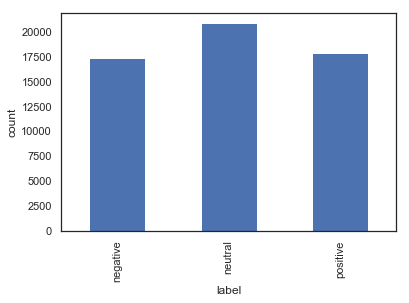

In [58]:
df6 = df_raw_combined.groupby('label').size().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('count')

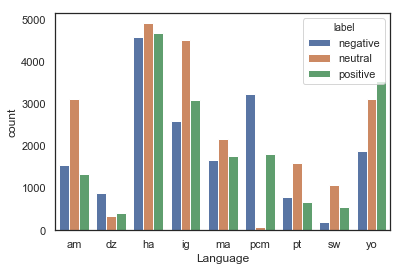

In [84]:
sns.countplot(data=df_raw_combined, x="language", hue="label")

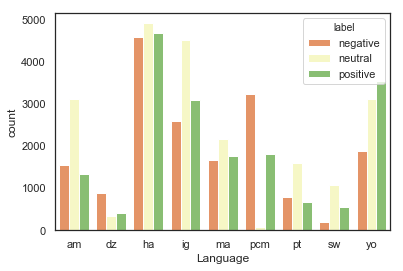

In [98]:
sequential_colors = sns.color_palette("RdYlGn", 3)
sns.countplot(data=df_raw_combined, x="language", hue="label", palette=sequential_colors)

# Top N words

### Top N occurances using Countvectorizer

In [9]:
def top_n_words(df_n):
    
    # setting up our CountVectorizer
    cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
    # print(cvec)
    stemmer = SnowballStemmer("english")
    
    print(df_n.head())
    
    df_n['stemmed'] = df_n.tweet.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
    # df.stemmed.head()
    
    # Calculate all the n-grams found in all documents
    cvec.fit(df_n.stemmed)
    list(islice(cvec.vocabulary_.items(), 20))
    
    # Check how many total n-grams we have
    # len(cvec.vocabulary_)
    
    # Initialize the vectorizer with new settings and check the new vocabulary length
    cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.1, ngram_range=(1,2))
    cvec.fit(df_n.stemmed)
    #len(cvec.vocabulary_)

    # transform the document into a “bag of words” representation
    cvec_counts = cvec.transform(df_n.stemmed)
    # print('sparse matrix shape:', cvec_counts.shape)
    # print('nonzero count:', cvec_counts.nnz)
    # print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))
    
    # Let’s look at the top 20 most common terms
    occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
    counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
    top_n_df = counts_df.sort_values(by='occurrences', ascending=False).head(20)
    
    return top_n_df

In [10]:
for df_name, df in translated_dfs_dict.items():
    df_name_new = df_name + "_top_n_df"
    exec(df_name_new + ' = top_n_words(df)')

               ID                                              tweet  \
0  am_train_00001   Tesfaye, you posted a picture of a professor ...   
1  am_train_00002    This is the corner of your knowledge, isn't it?   
2  am_train_00003   Is it called a report? If there is anything e...   
3  am_train_00004   ?? It reminded me of what we used to do in th...   
4  am_train_00005                    Is it clear?? ???? He recovered   

       label  
0   negative  
1   negative  
2   negative  
3   negative  
4   negative  
                ID                                              tweet  \
0   dz_train_00001   @user According to your site, you seem to hav...   
1   dz_train_00002                                 @user it's amazing   
2   dz_train_00003                               @user it's hilarious   
3   dz_train_00004  @user @user You are afraid to answer Nasser in...   
4   dz_train_00005   @user mrnka I swear to God 😂😂😂 Depression aft...   

      label  
0  negative  
1  negativ

In [11]:
for df_name, df in raw_dfs_dict.items():
    df_name_new = df_name + "_top_n_df"
    exec(df_name_new + ' = top_n_words(df)')

               ID                                              tweet     label
0  am_train_00001  Tesfaye ለካስ ጭብል ለብሰሽ የፕሮፌሰርን ፎቶ ለጥፈክ እልም ያልክ ባ...  negative
1  am_train_00002  ይሄው ነው አይደል የእውቀትሽ ጥግ....በሰሚ ሰሚ ከምትናገሪ ለምን ታሪክ...  negative
2  am_train_00003                ዘገበ ይባላል? ሌላ የሚባል ነገር ካለ አንተዉ ንገረን!  negative
3  am_train_00004  ?? ድሮ በዘመነ ኮዳክ ፎቶ ቤት ፍላሹ ፏ ሲል አይናችን ተጨፍኖ እንዳይወ...  negative
4  am_train_00005                                     ዠልጥ?? ???? ገገማ  negative
               ID                                              tweet     label
0  dz_train_00001  @user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة ....  negative
1  dz_train_00002                                  @user تبهليل هاذا  negative
2  dz_train_00003                       @user هاذي تبهليل ماشي فهامة  negative
3  dz_train_00004  @user @user تخاف نجاوب يا ناصر ببلوك لانو طريق...  negative
4  dz_train_00005  @user مرنكة أقسم بالله 😂😂😂تبهليل ما بعد منتصف ...  negative
               ID                                   

In [12]:
print(df_am_eng_top_n_df.head())
print(df_dz_eng_top_n_df.head())
print(df_ha_eng_top_n_df.head())
print(df_ig_eng_top_n_df.head())
print(df_ma_eng_top_n_df.head())
print(df_pcm_eng_top_n_df.head())
print(df_pt_eng_top_n_df.head())
print(df_sw_eng_top_n_df.head())
print(df_yo_eng_top_n_df.head())

         term  occurrences
511     peopl          464
611       say          455
207       don          406
238  ethiopia          342
604      said          341
     term  occurrences
93    don          176
130   god          175
322  said          102
192  know           91
324   say           89
          term  occurrences
39       bless         1430
131  god bless         1255
90         don          971
6        allah          776
203       know          659
      term  occurrences
118    god         1144
123   good         1107
249  peopl          599
155   igbo          568
35   bless          558
         term  occurrences
31         al          378
359        li          375
42        ana          367
434   morocco          270
432  moroccan          254
     term  occurrences
330   fit          509
748   sef          500
0    abeg          490
146  come          456
927   wan          446
     term  occurrences
163   don          272
234   god          249
320  like          

## Preprocessing

In [88]:
!pip install nltk

In [90]:
import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))

In [127]:
# FUNCTIONS TO REMOVE EMOJIS / PUNCTUATION CHARACTERS / WORDS WITH LENGTH LESS THAN 3 / BANNED WORDS:

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def remove_puncs(item):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890‹“…‘—’”'''
    for char in item:
        if char in punc:
            item = item.replace(char, "")
    return item

#re.sub(r'\b\w{1,3}\b', '', c)

def remove_less_three_char(item):
    if len(item) >= 3:
        return item
    else:
        return ""

banned = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 
          'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most',
          'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until',
          'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 
          'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 
          'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 
          'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself',
          'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 
          'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'user']
# banned = ['@user', '@user:'] # add stopped words here

In [128]:
## Preprocessing 

def preprocessing(df):

    df_translated_combined_new = df #df_translated_combined #df_raw_combined

    #Create list
    df_translated_combined_new['words'] = df_translated_combined_new.tweet.str.lower().str.split()
    # remove emojis
    df_translated_combined_new["words"] = [[remove_emojis(item) for item in x] for x in df_translated_combined_new["words"]]
    # remove punctuations
    df_translated_combined_new["words"] = [[remove_puncs(item) for item in x] for x in df_translated_combined_new["words"]]
    # remove words shorter than length 3
    df_translated_combined_new["words"] = [[remove_less_three_char(item) for item in x] for x in df_translated_combined_new["words"]]
    # remove empty strings from list
    df_translated_combined_new["words"] = [[item for item in x if item] for x in df_translated_combined_new["words"]]
    # remove words from banned list (including user + stopwords)
    df_translated_combined_new["words"] = [[item for item in x if item not in banned] for x in df_translated_combined_new["words"]]
    # remove stopwords
    # df_translated_combined_new["words"] = [[item for item in x if item not in stopwords.words('english')] for x in df_translated_combined_new["words"]]

    return df_translated_combined_new

### Top N occurances using MultiLabelBinarizer

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

def top_n_mb(df):

    df = preprocessing(df)
    s = df['words']

    mlb = MultiLabelBinarizer()
    mlb.fit(s)
    out = pd.DataFrame(mlb.transform(s),columns=mlb.classes_).groupby(df['label']).sum().replace(0,np.nan).stack().astype(int).sort_values(ascending=False)
    # out.replace(0,np.nan).stack().astype(int).sort_values(ascending=False)
    # out.sort_values(ascending=False)
    return out


In [32]:
print("*** English: ***")
for df_name, df in translated_dfs_dict.items():
    df_name_new = df_name + "_top_n_mb"
    exec(df_name_new + ' = top_n_mb(df)')
    print("\n",df_name.split("_")[1],":\n")
    exec("print(" + df_name_new + ".head())")
    
print("\n*** African: ***")    
for df_name, df in raw_dfs_dict.items():
    df_name_new = df_name + "_top_n_mb"
    exec(df_name_new + ' = top_n_mb(df)')
    print("\n",df_name.split("_")[1],":\n")
    exec("print(" + df_name_new + ".head())")

*** English: ***

 am :

label          
 neutral   the     1949
           and     1090
 negative  the      885
 neutral   that     746
 positive  the      741
dtype: int32

 dz :

label        
negative  and    393
          the    357
          you    284
positive  the    154
          you    151
dtype: int32

 ha :

label         
 positive  god    2489
 negative  the    1977
 positive  the    1657
 neutral   the    1495
 positive  you    1372
dtype: int32

 ig :

label         
 neutral   the    1425
 positive  you    1116
 neutral   you    1014
           and     817
 positive  god     738
dtype: int32

 ma :

label         
 neutral   the    841
 negative  the    825
           and    648
 neutral   and    624
 positive  the    620
dtype: int32

 pcm :

label         
negative  dey     1888
positive  dey     1061
negative  for      942
          like     928
          the      843
dtype: int32

 pt :

label          
 neutral   the     738
           and     433
 negative  the  

### Top N Count

In [33]:
def top_n_count(df_dict):
    
    for df_name, df in df_dict.items():
        df = preprocessing(df)
        # print(df)
        # top_n_df = df.explode('words').groupby(['language','label'])['words'].value_counts().reset_index(name='count')
        top_n_df = df.explode('words').groupby('label')['words'].value_counts().reset_index(name='count')
        df_name_new = df_name + "_top_n_count"
        exec(df_name_new + ' = top_n_df')
        print("\n",df_name.split("_")[1],":\n")
        exec("print(" + df_name_new + ".head())")
    
    return None
    
print("*** English: ***")    
top_n_count(translated_dfs_dict)
print("\n*** African: ***")
top_n_count(raw_dfs_dict)

*** English: ***

 am :

       label words  count
0   negative   the   1842
1   negative   and    714
2   negative   you    681
3   negative  that    481
4   negative   are    395

 dz :

      label words  count
0  negative   the    603
1  negative   and    553
2  negative   you    415
3  negative   are    142
4  negative  they    136

 ha :

       label words  count
0   negative   the   3456
1   negative   you   1871
2   negative   and   1394
3   negative   are   1302
4   negative   not    805

 ig :

       label words  count
0   negative   the    740
1   negative   you    638
2   negative   are    312
3   negative   and    300
4   negative  your    270

 ma :

       label words  count
0   negative   the   1858
1   negative   and   1054
2   negative   you    383
3   negative   are    271
4   negative   god    263

 pcm :

      label words  count
0  negative   dey   2712
1  negative   you   1263
2  negative   for   1156
3  negative   the   1136
4  negative  like   1024

 pt :

  

## Top N by label

In [83]:
def top_n_by_label(df_dict,n):
    
    for df_name, df in df_dict.items():
        
        df = preprocessing(df)
        df = df.explode('words').groupby('label')['words'].value_counts().reset_index(name='count')
        df_top_n_by_label = df.groupby('label').head(n)  
        
        df_name_new = df_name + "_top_n_by_label"
        exec(df_name_new + ' = df_top_n_by_label')
        print("\n",df_name.split("_")[1],":\n")
        exec("print(" + df_name_new + ")")
    
    return None


n = 5 # top n words per label
print("*** English: ***")    
top_n_by_label(translated_dfs_dict,n)
print("\n*** African: ***")
top_n_by_label(raw_dfs_dict,n)

*** English: ***

 am :

           label words  count
0       negative   the   1842
1       negative   and    714
2       negative   you    681
3       negative  that    481
4       negative   are    395
4611     neutral   the   4125
4612     neutral   and   1437
4613     neutral   you   1074
4614     neutral  that    895
4615     neutral   not    609
11668   positive   the   1458
11669   positive   and    599
11670   positive   you    489
11671   positive   for    296
11672   positive  that    280

 dz :

         label words  count
0     negative   the    603
1     negative   and    553
2     negative   you    415
3     negative   are    142
4     negative  they    136
2689   neutral   and    151
2690   neutral   the    137
2691   neutral   you    107
2692   neutral  what     33
2693   neutral  dont     31
3701  positive   the    248
3702  positive   you    206
3703  positive   and    196
3704  positive   god     90
3705  positive   are     52

 ha :

           label words  count
0


 yo :

          label   words  count
0      negative  yoruba    517
1      negative    wọ́n    378
2      negative    àwọn    366
3      negative     wọn    212
4      negative     ọmọ    183
8775    neutral  yoruba   1389
8776    neutral    àwọn    603
8777    neutral    wọ́n    476
8778    neutral  ibeere    434
8779    neutral     àti    401
20642  positive  yoruba    809
20643  positive     ire    454
20644  positive  gbogbo    441
20645  positive     fún    378
20646  positive     ọmọ    338


### Working with combined dataframes

In [140]:
df_translated_combined_new = preprocessing(df_translated_combined)
df_translated_combined_new

,ID,tweet,label,language,words
0,am_train_00001,"Tesfaye, you posted a picture of a professor ...",negative,am,"[tesfaye, posted, picture, professor, wearing,..."
1,am_train_00002,"This is the corner of your knowledge, isn't it?",negative,am,"[corner, knowledge, isnt]"
2,am_train_00003,Is it called a report? If there is anything e...,negative,am,"[called, report, anything, else, say, tell]"
3,am_train_00004,?? It reminded me of what we used to do in th...,negative,am,"[reminded, used, kodak, photo, booth, flash, w..."
4,am_train_00005,Is it clear?? ???? He recovered,negative,am,"[clear, recovered]"
...,...,...,...,...,...
56093,yo_train_08518,"RT @user: The eyes of a bat are here, the eye...",positive,yo,"[eyes, bat, eyes, owl, seeing, anchors, today,..."
56094,yo_train_08519,"We are grateful to our opponents, we will be ...",positive,yo,"[grateful, opponents, wise, yes, know, trying,..."
56095,yo_train_08520,"The person who was yesterday, who is today, ca...",positive,yo,"[person, yesterday, today, cannot, tomorrow, w..."
56096,yo_train_08521,My God is a miracle worker #yoruba,positive,yo,"[god, miracle, worker, yoruba]"


In [145]:
# Explode and count

df_translated_combined_new1=df_translated_combined_new.explode('words').groupby('label')['words'].value_counts().reset_index(name='count')
df_translated_combined_new1

,label,words,count
0,negative,dey,2743
1,negative,like,1760
2,negative,people,1642
3,negative,god,1444
4,negative,dont,1314
...,...,...,...
80097,positive,ዕድሜ,1
80098,positive,ធនាន្រ្រ្រ្រ្រ្រ្រ,1
80099,positive,ស្រ្រ្រ្រ្រ,1
80100,positive,ọma,1


In [146]:
df_translated_combined_new_lang=df_translated_combined_new.explode('words').groupby(['language','label'])['words'].value_counts().reset_index(name='count')
df_translated_combined_new_lang

,language,label,words,count
0,am,negative,people,204
1,am,negative,country,119
2,am,negative,dont,118
3,am,negative,said,95
4,am,negative,like,94
...,...,...,...,...
130675,yo,positive,ósogbo,1
130676,yo,positive,ósun,1
130677,yo,positive,óyő,1
130678,yo,positive,úgúgû,1


In [147]:
df_translated_combined_new_lang2=df_translated_combined_new.explode('words').groupby('label')['words'].value_counts().reset_index(name='count')
df_translated_combined_new_lang2

,label,words,count
0,negative,dey,2743
1,negative,like,1760
2,negative,people,1642
3,negative,god,1444
4,negative,dont,1314
...,...,...,...
80097,positive,ዕድሜ,1
80098,positive,ធនាន្រ្រ្រ្រ្រ្រ្រ,1
80099,positive,ស្រ្រ្រ្រ្រ,1
80100,positive,ọma,1


In [148]:
df_translated_combined_new_lang3 = df_translated_combined_new_lang2.groupby('label').head(5)
df_translated_combined_new_lang3

,label,words,count
0,negative,dey,2743
1,negative,like,1760
2,negative,people,1642
3,negative,god,1444
4,negative,dont,1314
24848,neutral,yoruba,1595
24849,neutral,dont,1165
24850,neutral,people,1093
24851,neutral,one,1008
24852,neutral,know,966


In [149]:
df_translated_combined_new2 = df_translated_combined_new.groupby('label')['label'].count()
df_translated_combined_new2

label
negative    17363
neutral     20879
positive    17856
Name: label, dtype: int64

In [150]:
df_translated_combined_new['label'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

Text(0,0.5,'count')

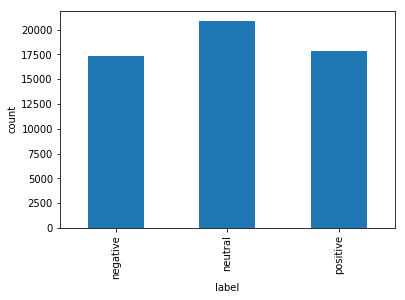

In [151]:
df_translated_combined_new3 = df_translated_combined_new.groupby('label').size().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('count')

In [152]:
df_translated_combined_new4 = df_translated_combined_new.groupby('label').head(5)
df_translated_combined_new4

,ID,tweet,label,language,words
0,am_train_00001,"Tesfaye, you posted a picture of a professor ...",negative,am,"[tesfaye, posted, picture, professor, wearing,..."
1,am_train_00002,"This is the corner of your knowledge, isn't it?",negative,am,"[corner, knowledge, isnt]"
2,am_train_00003,Is it called a report? If there is anything e...,negative,am,"[called, report, anything, else, say, tell]"
3,am_train_00004,?? It reminded me of what we used to do in th...,negative,am,"[reminded, used, kodak, photo, booth, flash, w..."
4,am_train_00005,Is it clear?? ???? He recovered,negative,am,"[clear, recovered]"
1548,am_train_01549,Did I say something bad?!,neutral,am,"[say, something, bad]"
1549,am_train_01550,A unique natural feature ***** East African w...,neutral,am,"[unique, natural, feature, east, african, wate..."
1550,am_train_01551,B/J Asamune Tsige and Deputy Prime Minister De...,neutral,am,"[asamune, tsige, deputy, prime, minister, deme..."
1551,am_train_01552,"?? Okay, my brother, I will be planted. Who i...",neutral,am,"[okay, brother, planted, love, much, sincere]"
1552,am_train_01553,It is knowing this that Dr. Abi became a Chri...,neutral,am,"[knowing, abi, became, christian]"


## Wordcloud

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from wordcloud import (WordCloud, get_single_color_func)
from collections import Counter
import random

In [100]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


def wordcloud_builder(df):
    
    n = 5 #change this value to get top n elements by label
    
    df_wc = df.explode('words').groupby('label')['words'].value_counts().reset_index(name='count')
    df_wc = df_wc.groupby('label').head(n)   
    # print(df_wc)

    labels_list = ['negative','neutral','positive']
    colors_list = ['red', 'yellow', 'green']
    colors_hex = ['#ed230a','#f8db30','#4c9a2b']

    label_conditions = [
        (df_wc['label'] == labels_list[0]),
        (df_wc['label'] == labels_list[1]), 
        (df_wc['label'] == labels_list[2])
    ]

    df_wc['color'] = np.select(label_conditions, colors_hex)
    
    #create a dict of colors and matching movies
    color_to_words = df_wc.groupby('color')['words'].agg(list).to_dict()
    #print(color_to_words)

    #Creating the text variable
    word_ls = df_wc.words
    #print(word_ls)

    #Creating a count (I want the words to be the same size) #### CAN BE CHANGED
    word_could_dict = Counter(word_ls)

    # Creating word_cloud with text as argument in .generate() method
    wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
    
    # Words that are not in any of the color_to_words values
    # will be colored with a grey single color function
    default_color = 'grey'

    # Create a color function with single tone
    grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

    # Apply our color function
    wordcloud.recolor(color_func=grouped_color_func)
    
    return wordcloud

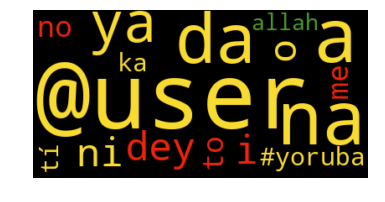

In [66]:
# Sample wordcloud for combined datafile

# wordcloud = wordcloud_builder(df_translated_combined_new)

# # Display the generated Word Cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()


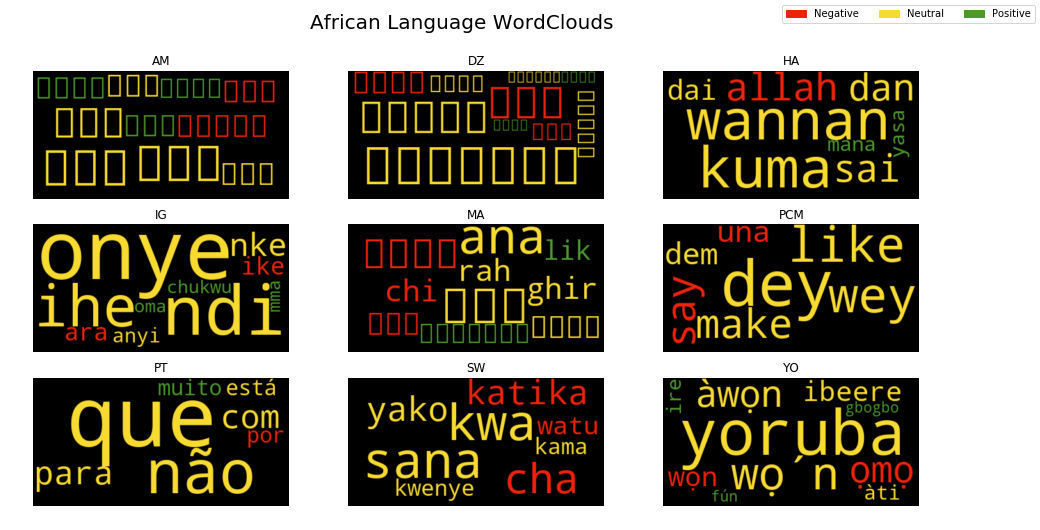

In [108]:
# African Language Wordclouds

plt.subplots(figsize=(16,8))

for i, (df_name, df) in enumerate(raw_dfs_dict.items()):
    df = preprocessing(df)
    df_name_new = df_name.split("_")[1]
    #print(df_name_new)
    wordcloud = wordcloud_builder(df)
    plt.subplot(3, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(df_name_new.upper())

# Legend
red_patch = mpatches.Patch(color='#ed230a', label='Negative')
yellow_patch = mpatches.Patch(color='#f8db30', label='Neutral')
green_patch = mpatches.Patch(color='#4c9a2b', label='Positive')
handles=[red_patch,yellow_patch,green_patch]
labels = ['Negative','Neutral','Positive']
plt.figlegend(handles, labels, loc = 'upper right', ncol=5, labelspacing=0.)

# Add overall title
plt.suptitle("African Language WordClouds", fontsize=20)

# Combine all the plots, save image and display
plt.savefig("wordclouds.png")
plt.show()

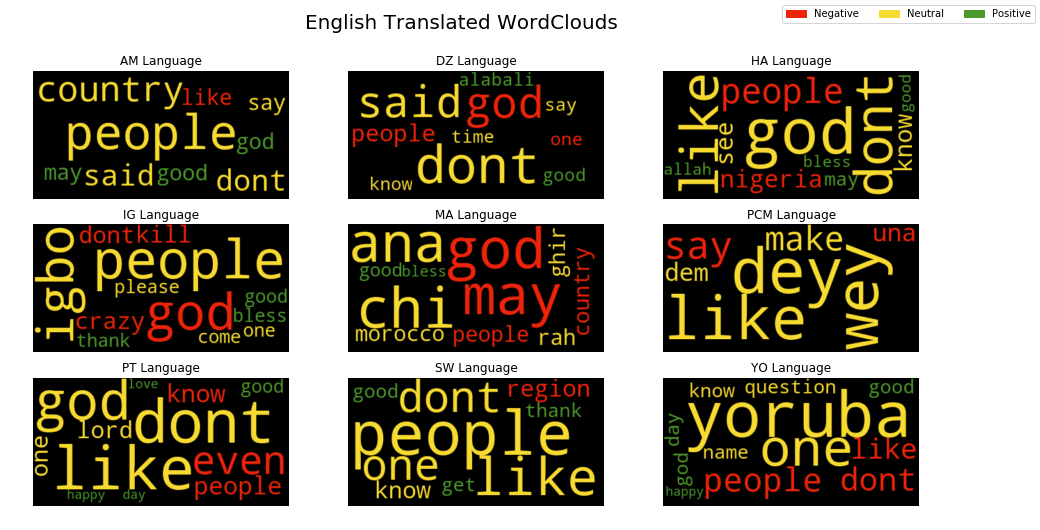

In [156]:
# English Translated Wordclouds

plt.subplots(figsize=(16,8))

for i, (df_name, df) in enumerate(translated_dfs_dict.items()):
    df = preprocessing(df)
    df_name_new = df_name.split("_")[1]
    #print(df_name_new)
    wordcloud = wordcloud_builder(df)
    plt.subplot(3, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(df_name_new.upper() + " Language")

# Legend
red_patch = mpatches.Patch(color='#ed230a', label='Negative')
yellow_patch = mpatches.Patch(color='#f8db30', label='Neutral')
green_patch = mpatches.Patch(color='#4c9a2b', label='Positive')
handles=[red_patch,yellow_patch,green_patch]
labels = ['Negative','Neutral','Positive']
plt.figlegend(handles, labels, loc = 'upper right', ncol=5, labelspacing=0.)

# Add overall title
plt.suptitle("English Translated WordClouds", fontsize=20)

# Combine all the plots, save image and display
plt.savefig("wordclouds_english.png")
plt.show()

